# Part I - WeatherPy
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.

In [1]:
!pip install citipy

In [2]:
import requests
import json
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from random import uniform
import numpy as np
from pprint import pprint
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# From Citipy I want to generate a list of random cities all over the world
lat_lngs = []   #list for my latitudes and longitudes
cities = []     #list for my cities

# Create the list of random coordinate combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1700)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1700)
lat_lngs = zip(lats, lngs)

#Create a list of cities near these coordinates
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Printing to check everything is working the way I want.
#len(lngs)
#len(lats)
len(cities)
#cities


653

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [4]:
# I will need to call each city and get it's corresponding lat, Temp (F/Imperial), Humidity 
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="
response = requests.get(url+"London")
response_json=response.json()
pprint(response_json)

{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1627355741,
 'id': 2643743,
 'main': {'feels_like': 63.57,
          'humidity': 84,
          'pressure': 1010,
          'temp': 63.57,
          'temp_max': 65.95,
          'temp_min': 59.09},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2019646,
         'sunrise': 1627359414,
         'sunset': 1627415813,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 259, 'gust': 7, 'speed': 1.99}}


In [5]:
for city in cities:
    print(city)

georgetown
amapa
vaini
ushuaia
hobart
platanos
bolungarvik
port alfred
rikitea
saint george
usinsk
new norfolk
les cayes
jamestown
tsihombe
yerbogachen
airai
casino
thompson
namatanai
bilma
clyde river
provideniya
narsaq
hermanus
bluff
ovalle
antu
tocopilla
asau
monrovia
tateyama
mehamn
belushya guba
punta arenas
narrabri
mataura
torbay
busselton
pevek
cabo san lucas
longyearbyen
sao joao da barra
wulanhaote
kodiak
ketchikan
chokurdakh
saint-joseph
biak
barahona
east london
barrow
upernavik
najran
cape town
albany
hilo
tasiilaq
makakilo city
illoqqortoormiut
mar del plata
fare
moose factory
borazjan
paradwip
umzimvubu
atuona
puerto ayora
avarua
dahuk
lakota
estepona
hagere hiywet
victoria
ponta do sol
ostrovnoy
khatanga
ribeira grande
fort-shevchenko
hasaki
butaritari
souillac
jalu
lorengau
comodoro rivadavia
hay river
amderma
kuusamo
andros town
tuktoyaktuk
bambous virieux
taolanaro
jiroft
sao filipe
uyuni
bathsheba
kozan
hithadhoo
pembroke
gambo
anori
tiksi
attawapiskat
meyungs
de aa

In [6]:
# List for the data to make DF. 
cities_found = []
countries = []
lats = []
lngs = []
temps = []
humidities = []
clouds = []
winds = []

# Set the initial count to tell my for loop to take a break from calling the API.
count_one = 0
set_one = 1

# Loop through the Citipi list coordinates and identify if there is a cooresponding city on my URL.
for city in cities:
    try:
        response = requests.get(url + city).json()
        countries.append(response['sys']['country'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        cities_found.append(city)
        #print(f"Beginning Data Retrieval")     
        #print(f"-----------------------------")
        if count_one > 48:
            count_one = 1
            set_one += 1
            time.sleep(60)
        else:
            count_one+=1
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except:
        #print("    ")
        print("City not found. Skipping..... ")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        
        

Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | amapa
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | platanos
City not found. Skipping..... 
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | usinsk
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | les cayes
Processing Record 13 of Set 1 | jamestown
City not found. Skipping..... 
Processing Record 14 of Set 1 | yerbogachen
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | casino
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | namatanai
Processing Record 19 of Set 1 | bilma
Processing Record 20 of Set 1 | clyde river
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | narsaq
Processing Record 23 of Set 1 | hermanus
Pr

Processing Record 44 of Set 4 | mazatlan
City not found. Skipping..... 
Processing Record 45 of Set 4 | dryden
Processing Record 46 of Set 4 | meulaboh
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | portland
Processing Record 49 of Set 4 | nanortalik
City not found. Skipping..... 
Processing Record 2 of Set 5 | port elizabeth
City not found. Skipping..... 
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | sault sainte marie
Processing Record 5 of Set 5 | watertown
Processing Record 6 of Set 5 | balmazujvaros
City not found. Skipping..... 
Processing Record 7 of Set 5 | kokopo
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | escanaba
Processing Record 10 of Set 5 | naze
Processing Record 11 of Set 5 | ocampo
Processing Record 12 of Set 5 | vestmannaeyjar
Processing Record 13 of Set 5 | kargopol
City not found. Skipping..... 
Processing Record 14 of Set 5 | harper
City not found. Skipping..... 
Processing Record 1

Processing Record 35 of Set 8 | camopi
City not found. Skipping..... 
Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | birjand
Processing Record 38 of Set 8 | tres arroyos
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | bluefields
Processing Record 41 of Set 8 | port hedland
Processing Record 42 of Set 8 | napanee
Processing Record 43 of Set 8 | arraial do cabo
Processing Record 44 of Set 8 | amuntai
Processing Record 45 of Set 8 | eltham
Processing Record 46 of Set 8 | faanui
Processing Record 47 of Set 8 | oil city
Processing Record 48 of Set 8 | tura
Processing Record 49 of Set 8 | mount gambier
City not found. Skipping..... 
Processing Record 2 of Set 9 | prieska
Processing Record 3 of Set 9 | sobolevo
Processing Record 4 of Set 9 | tilichiki
City not found. Skipping..... 
Processing Record 5 of Set 9 | luganville
Processing Record 6 of Set 9 | vardo
Processing Record 7 of Set 9 | luderitz
Processing Record 8 of Set 9 | vuktyl
Processing

Processing Record 28 of Set 12 | saint anthony
Processing Record 29 of Set 12 | zhigansk
Processing Record 30 of Set 12 | lakatoro
Processing Record 31 of Set 12 | sabha
Processing Record 32 of Set 12 | eureka
Processing Record 33 of Set 12 | kutum
Processing Record 34 of Set 12 | luwuk
Processing Record 35 of Set 12 | port macquarie
Processing Record 36 of Set 12 | wenling
Processing Record 37 of Set 12 | tiffin
Processing Record 38 of Set 12 | leca da palmeira
Processing Record 39 of Set 12 | abu zabad
Processing Record 40 of Set 12 | balkhash
Processing Record 41 of Set 12 | akyab
City not found. Skipping..... 
Processing Record 42 of Set 12 | thouars
Processing Record 43 of Set 12 | nayoro
Processing Record 44 of Set 12 | gardner
Processing Record 45 of Set 12 | zurrieq
Processing Record 46 of Set 12 | san cristobal
Processing Record 47 of Set 12 | ciudad bolivar
Processing Record 48 of Set 12 | lavrentiya
City not found. Skipping..... 
Processing Record 49 of Set 12 | andrelandia


In [7]:
#Checking the number of cities collected.
len(cities_found)

607

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Making my DF.
cities_df = pd.DataFrame({
    "City":cities_found,
    "Country":countries,
    "Latitude":lats,
    "Longitude":lngs, 
    "Temperature":temps,
    "Humidity":humidities,
    "Cloudiness":clouds,
    "Wind":winds,
})
pd.set_option("display.max_rows", None, "display.max_columns", None)
cities_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
0,georgetown,MY,5.4112,100.3354,86.90,78,40,1.01
1,amapa,BR,1.0000,-52.0000,70.21,97,64,2.21
2,vaini,TO,-21.2000,-175.2000,77.16,78,75,12.66
3,ushuaia,AR,-54.8000,-68.3000,33.46,93,75,4.61
4,hobart,AU,-42.8794,147.3294,61.27,56,75,1.99
5,platanos,GR,37.6667,21.6167,80.71,41,0,4.38
6,port alfred,ZA,-33.5906,26.8910,61.45,31,30,11.21
7,rikitea,PF,-23.1203,-134.9692,74.98,81,98,18.41
8,saint george,US,37.1041,-113.5841,78.53,83,1,3.44
9,usinsk,RU,65.9939,57.5281,42.69,89,100,12.19


In [9]:
#Exporting to CSV file. 
cities_df.to_csv("cities_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [16]:
cities_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,19.444017,21.503180,69.089621,71.556837,52.599671,7.939506
std,33.529559,90.732074,13.484872,19.794313,39.555278,5.710679
min,-54.800000,-175.200000,33.460000,12.000000,0.000000,0.000000
25%,-8.787700,-62.457600,60.045000,59.000000,8.000000,3.740000
50%,23.228100,26.532800,70.520000,76.000000,61.000000,6.330000
75%,47.402100,102.219700,80.240000,87.000000,94.000000,10.435000
max,78.218600,179.316700,99.770000,100.000000,100.000000,37.380000


In [10]:
#  Get the indices of cities that have humidity over 100%. There are none.
cities_df[cities_df['Humidity']>100]

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind


Your first requirement is to create a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot¶

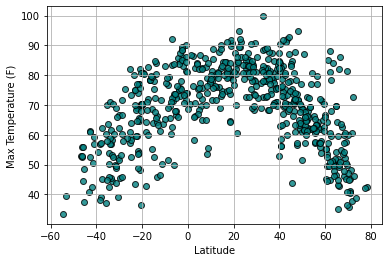

In [53]:
x_values = cities_df['Latitude']
y_values = cities_df['Temperature']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot¶

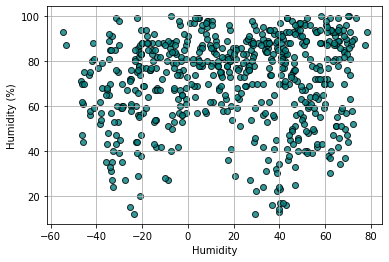

In [52]:
x_values = cities_df['Latitude']
y_values = cities_df['Humidity']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Humidity')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

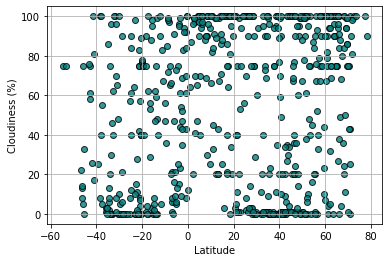

In [50]:
x_values = cities_df['Latitude']
y_values = cities_df['Cloudiness']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot¶

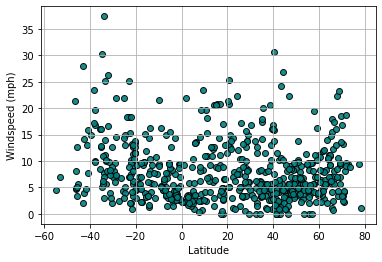

In [51]:
x_values = cities_df['Latitude']
y_values = cities_df['Wind']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.9)
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)
plt.show()

## Linear Regression

Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [74]:
from scipy import stats

In [105]:
#divide Data Set into Northern and Southern hemisheres.
northern_df=cities_df[cities_df['Latitude']>0]
southern_df=cities_df[cities_df['Latitude']<0]
#Just checking I didn't leave any city out.
equator=cities_df[cities_df['Latitude']==0]
#len(equator)
northern_df

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
0,georgetown,MY,5.4112,100.3354,86.90,78,40,1.01
1,amapa,BR,1.0000,-52.0000,70.21,97,64,2.21
5,platanos,GR,37.6667,21.6167,80.71,41,0,4.38
8,saint george,US,37.1041,-113.5841,78.53,83,1,3.44
9,usinsk,RU,65.9939,57.5281,42.69,89,100,12.19
11,les cayes,HT,18.2000,-73.7500,79.45,80,100,4.97
12,jamestown,US,42.0970,-79.2353,69.39,77,1,4.23
13,yerbogachen,RU,61.2767,108.0108,85.05,38,4,8.16
16,thompson,CA,55.7435,-97.8558,57.36,72,20,0.00
18,bilma,NE,18.6853,12.9164,89.85,41,95,6.58


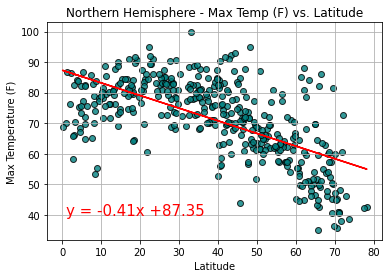

The r-value is: 0.39458727072059774


In [106]:
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")



## Southern Hemisphere - Max Temp vs. Latitude Linear Regression

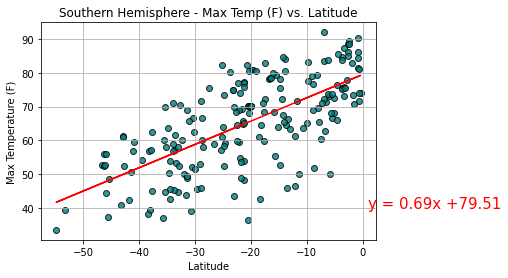

The r-value is: 0.46080927044538117


In [107]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression¶

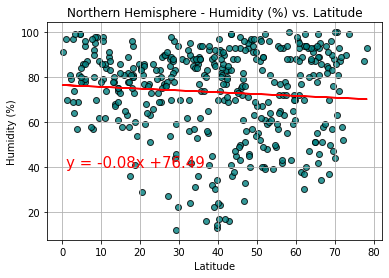

The r-value is: 0.006272001662660852


In [108]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

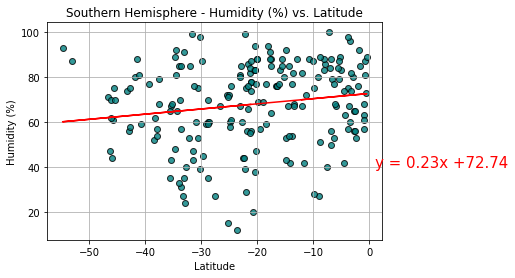

The r-value is: 0.02620493481129601


In [109]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶

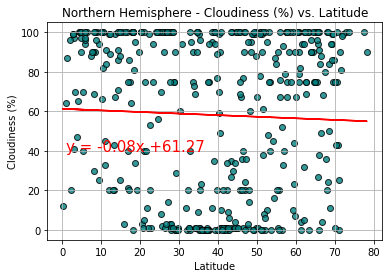

The r-value is: 0.0015850796395589432


In [110]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

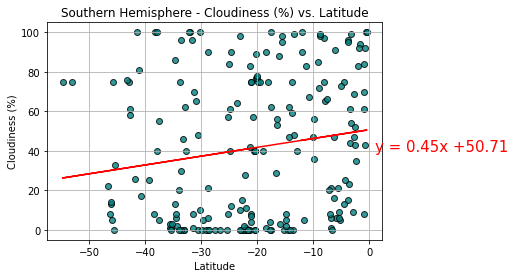

The r-value is: 0.02623972063183603


In [111]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

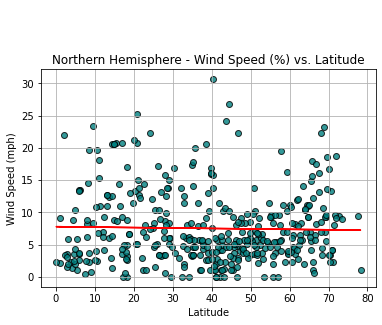

The r-value is: 0.0006118404393157073


In [114]:
x_values = northern_df['Latitude']
y_values = northern_df['Wind']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on windiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (%) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

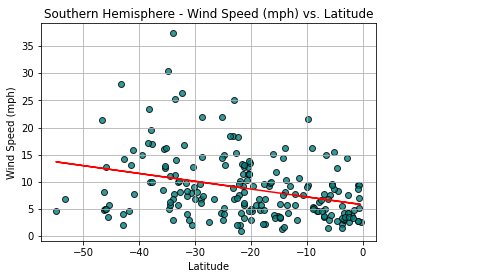

The r-value is: 0.09994562731121355


In [115]:
x_values = southern_df['Latitude']
y_values = southern_df['Wind']
plt.scatter(x_values,y_values, c='teal',norm=0.7, edgecolors ='black', alpha=0.8)
# Perform a linear regression on windiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
# Add regression line
plt.plot(x_values,regress_values,"r-")
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Label plot and annotate the line equation
plt.annotate(line_eq,(1,40),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.grid(True)
plt.show()


# Print r value
print(f"The r-value is: {rvalue**2}")


Your final notebook must:

* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

## Three Observable Trends